In [ ]:
!pip install requests

In [ ]:
import pandas as pd

# Loading dataframe

Our original dataset contains phytochemicals found in ***Hordeum vulgare***. These phytochemicals were obtained from literature and IMPPAT database containing phytochemicals of Indian medicinal plants to date.

In [ ]:
df = pd.read_csv('docking_results.csv')

In [ ]:
df

,PubChem_CID,name,smiles,Binding_affinity
0,5281675,Orientin,C1=CC(=C(C=C1C2=CC(=O)C3=C(O2)C(=C(C=C3O)O)[C@...,-8.3
1,441381,Saponarin,C1=CC(=CC=C1C2=CC(=O)C3=C(C(=C(C=C3O2)O[C@H]4[...,-8.3
2,108065,Proanthocyanidin,COC1=C(C=C(C=C1O)C2[C@@H](CC3=C(O2)C(=C(C=C3O)...,-8.2
3,9064,Cianidanol,C1[C@@H]([C@H](OC2=CC(=CC(=C21)O)O)C3=CC(=C(C=...,-8.2
4,72276,(-)-Epicatechin,C1[C@H]([C@H](OC2=CC(=CC(=C21)O)O)C3=CC(=C(C=C...,-8.2
5,146798,Procyanidin B3,C1[C@@H]([C@H](OC2=C1C(=CC(=C2[C@H]3[C@@H]([C@...,-8.1
6,66868,Porphyrin,C1=CC2=CC3=CC=C(N3)C=C4C=CC(=N4)C=C5C=CC(=N5)C...,-8.1
7,5280441,Vitexin,C1=CC(=CC=C1C2=CC(=O)C3=C(O2)C(=C(C=C3O)O)[C@H...,-8.0
8,5280794,Stigmasterol,CC[C@H](/C=C/[C@@H](C)[C@H]1CC[C@@H]2[C@@]1(CC...,-8.0
9,5280445,Luteolin,C1=CC(=C(C=C1C2=CC(=O)C3=C(C=C(C=C3O2)O)O)O)O,-8.0


In [ ]:
!pip install rdkit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.1/33.1 MB 30.3 MB/s eta 0:00:00


In [ ]:
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski
import pandas as pd
import numpy as np

# Lipinski descriptor calculation

In [ ]:
# Inspired by: https://codeocean.com/explore/capsules?query=tag:data-curation

def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        # Check if elem is a valid SMILES string before converting
        if isinstance(elem, str):
            mol=Chem.MolFromSmiles(elem)
            moldata.append(mol)

    baseData= np.arange(1,1)
    i=0
    for mol in moldata:

        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)

        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])

        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1

    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)

    return descriptors

The descriptors were calculated using the smiles obtained from **PubChem.**

In [ ]:
df_lipinski = lipinski(df.smiles)

In [ ]:
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,448.380,-0.20270,8.0,11.0
1,594.522,-2.43520,10.0,15.0
2,592.553,3.29800,9.0,12.0
3,290.271,1.54610,5.0,6.0
4,290.271,1.54610,5.0,6.0
5,578.526,2.99500,10.0,12.0
6,310.360,4.65560,2.0,2.0
7,432.381,0.09170,7.0,10.0
8,412.702,7.80080,1.0,1.0
9,286.239,2.28240,4.0,6.0


Both dataframes, df and df_lipinski were combined.

In [ ]:
df_combined = pd.concat([df,df_lipinski], axis=1)

In [ ]:
df_combined

,PubChem_CID,name,smiles,Binding_affinity,MW,LogP,NumHDonors,NumHAcceptors
0,5281675,Orientin,C1=CC(=C(C=C1C2=CC(=O)C3=C(O2)C(=C(C=C3O)O)[C@...,-8.3,448.380,-0.20270,8.0,11.0
1,441381,Saponarin,C1=CC(=CC=C1C2=CC(=O)C3=C(C(=C(C=C3O2)O[C@H]4[...,-8.3,594.522,-2.43520,10.0,15.0
2,108065,Proanthocyanidin,COC1=C(C=C(C=C1O)C2[C@@H](CC3=C(O2)C(=C(C=C3O)...,-8.2,592.553,3.29800,9.0,12.0
3,9064,Cianidanol,C1[C@@H]([C@H](OC2=CC(=CC(=C21)O)O)C3=CC(=C(C=...,-8.2,290.271,1.54610,5.0,6.0
4,72276,(-)-Epicatechin,C1[C@H]([C@H](OC2=CC(=CC(=C21)O)O)C3=CC(=C(C=C...,-8.2,290.271,1.54610,5.0,6.0
5,146798,Procyanidin B3,C1[C@@H]([C@H](OC2=C1C(=CC(=C2[C@H]3[C@@H]([C@...,-8.1,578.526,2.99500,10.0,12.0
6,66868,Porphyrin,C1=CC2=CC3=CC=C(N3)C=C4C=CC(=N4)C=C5C=CC(=N5)C...,-8.1,310.360,4.65560,2.0,2.0
7,5280441,Vitexin,C1=CC(=CC=C1C2=CC(=O)C3=C(O2)C(=C(C=C3O)O)[C@H...,-8.0,432.381,0.09170,7.0,10.0
8,5280794,Stigmasterol,CC[C@H](/C=C/[C@@H](C)[C@H]1CC[C@@H]2[C@@]1(CC...,-8.0,412.702,7.80080,1.0,1.0
9,5280445,Luteolin,C1=CC(=C(C=C1C2=CC(=O)C3=C(C=C(C=C3O2)O)O)O)O,-8.0,286.239,2.28240,4.0,6.0


The binding affinity of molecules calculated from PyRx was visualized using a scatter plot.

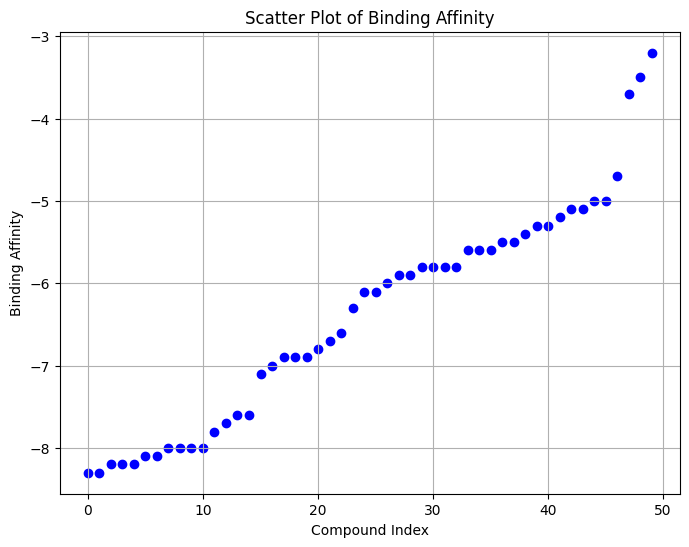

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Generate a scatter plot for Binding Affinity
plt.figure(figsize=(8, 6))
plt.scatter(df.index, df['Binding_affinity'], color='b', marker='o')
plt.title('Scatter Plot of Binding Affinity')
plt.xlabel('Compound Index')
plt.ylabel('Binding Affinity')
plt.grid(True)
plt.show()

In [ ]:
!pip install mordred

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.8/128.8 kB 7.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 26.0 MB/s eta 0:00:00
  Created wheel for mordred: filename=mordred-1.2.0-py3-none-any.whl size=176717 sha256=dc8d0940c7932dc55e67a4b4f3f24c94a711581ffe76eee778673a84e9858140
  Stored in directory: /root/.cache/pip/wheels/a7/4f/b8/d4c6591f6ac944aaced7865b349477695f662388ad958743c7
Successfully built mordred
  Attempting uninstall: networkx
    Found existing installation: networkx 3.3
    Uninstalling networkx-3.3:
      Successfully uninstalled networkx-3.3


In [ ]:
import rdkit
from rdkit.Chem import Descriptors, Lipinski
from rdkit.Chem import AllChem
from rdkit import Chem
from rdkit.Chem import Descriptors
from rdkit.ML.Descriptors import MoleculeDescriptors
from mordred import Calculator, descriptors

# Data split

The data was split into training X and testing Y set.

In [ ]:
X = df_combined.drop(['Binding_affinity', 'name', 'smiles'], axis=1)
X

,PubChem_CID,MW,LogP,NumHDonors,NumHAcceptors
0,5281675,448.380,-0.20270,8.0,11.0
1,441381,594.522,-2.43520,10.0,15.0
2,108065,592.553,3.29800,9.0,12.0
3,9064,290.271,1.54610,5.0,6.0
4,72276,290.271,1.54610,5.0,6.0
5,146798,578.526,2.99500,10.0,12.0
6,66868,310.360,4.65560,2.0,2.0
7,5280441,432.381,0.09170,7.0,10.0
8,5280794,412.702,7.80080,1.0,1.0
9,5280445,286.239,2.28240,4.0,6.0


In [ ]:
Y = df_combined.Binding_affinity
Y

,Binding_affinity
0,-8.3
1,-8.3
2,-8.2
3,-8.2
4,-8.2
5,-8.1
6,-8.1
7,-8.0
8,-8.0
9,-8.0


# Building a linear regression model

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Add random_state to ensure consistent train-test splits
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')


Mean Squared Error: 0.47
R-squared: 0.61


# Cross validation

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [ ]:
# Define the number of folds (e.g., 5 folds here)
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
# Calculate R-squared for each fold
cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='r2')

# Print the results for each fold
print(f'R-squared scores for each fold: {cv_results}')
print(f'Mean R-squared score: {cv_results.mean():.2f}')
print(f'Standard Deviation of R-squared scores: {cv_results.std():.2f}')

R-squared scores for each fold: [0.50725787 0.63081058 0.52437261 0.69587318 0.19002884]
Mean R-squared score: 0.51
Standard Deviation of R-squared scores: 0.17
